<a href="https://colab.research.google.com/github/Lnofeisone/finance/blob/master/BankAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bankfind
!pip install fdicdata
import fdicdata as fdic
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from google.colab import data_table
data_table.enable_dataframe_formatter()
import bankfind as bf

In [ ]:


taxonomy = fdic.dataTaxonomy("institution")
data_table.DataTable(taxonomy, include_index=False, num_rows_per_page=300)

Downloaded institution_properties.yaml to /tmp/institution_properties.yaml


In [ ]:
allInstitutions = fdic.getInstitutionsAll()
activeBanks = allInstitutions[allInstitutions['ACTIVE'] == 1]
activeCommunityBanks = activeBanks[activeBanks['CB'] == 1]

/usr/local/lib/python3.11/dist-packages/fdicdata/getInstitutionsAll.py:12: DtypeWarning: Columns (88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(response)


In [ ]:
activeCommunityBanks.head(10)

STNAME   CERT  DOCKET  ACTIVE                     ADDRESS  \
4196  Massachusetts  28368    1452       1               1 College Ave   
4197         Kansas   5830   12352       1               610 Oregon St   
4199   Pennsylvania  29471    3506       1                 935 5th Ave   
4201       Illinois  11715       0       1               107 E Main St   
4203       Illinois   9259   11794       1                100 E 4th St   
4204       Missouri   8898   13466       1  8924 Saint Charles Rock Rd   
4205        Georgia  59285       0       1  600 Veterans Parkway North   
4206       Kentucky   8121   13850       1                  1 W 2nd St   
4208       Arkansas   1299   13695       1        301 Shoppingway Blvd   
4209     California  58411       0       1           500 Riverside Way   

          ASSET BKCLASS  CHANGEC1  CHANGEC2  CHANGEC3  CHANGEC4  CHANGEC5  \
4196   631344.0      SB       NaN       NaN       NaN       NaN       NaN   
4197    95880.0      NM       NaN       NaN       NaN       NaN       NaN   
4199    97606.0      SI       NaN       NaN       NaN       NaN       NaN   
4201    87507.0      NM       NaN       NaN       NaN       NaN       NaN   
4203   203462.0      NM       NaN       NaN       NaN       NaN       NaN   
4204   310193.0      NM       NaN       NaN       NaN       NaN       NaN   
4205   130324.0      NM     520.0       NaN       NaN       NaN       NaN   
4206    69312.0      NM       NaN       NaN       NaN       NaN       NaN   
4208  1812062.0      SM       NaN       NaN       NaN       NaN       NaN   
4209   657922.0      SM       NaN       NaN       NaN       NaN       NaN   

      CHANGEC6  CHANGEC7  CHANGEC8  CHANGEC9  CHANGEC10  CHANGEC11  CHANGEC12  \
4196       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4197       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4199       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4201       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4203       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4204       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4205       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4206       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4208       NaN       NaN       NaN       NaN        NaN        NaN        NaN   
4209       NaN       NaN       NaN       NaN        NaN        NaN        NaN   

      CHANGEC13  CHANGEC14  CHANGEC15  CHARTER CHRTAGNT CONSERVE  \
4196        NaN        NaN        NaN   701452      OCC        N   
4197        NaN        NaN        NaN        0    STATE        N   
4199        NaN        NaN        NaN        0    STATE        N   
4201        NaN        NaN        NaN        0    STATE        N   
4203        NaN        NaN        NaN        0    STATE        N   
4204        NaN        NaN        NaN        0    STATE        N   
4205        NaN        NaN        NaN        0    STATE        N   
4206        NaN        NaN        NaN        0    STATE        N   
4208        NaN        NaN        NaN        0    STATE        N   
4209        NaN        NaN        NaN        0    STATE        N   

              CITY  CLCODE  CMSA_NO  CMSA      COUNTY    DATEUPDT  DENOVO  \
4196    Somerville      38      NaN   NaN   Middlesex  11/18/2024     0.0   
4197      Hiawatha      21      NaN   NaN       Brown  08/31/2022     0.0   
4199     Ford City      42      NaN   NaN   Armstrong  08/31/2022     0.0   
4201    Yates City      21      NaN   NaN        Knox  08/31/2022     0.0   
4203       Hoffman      21      NaN   NaN     Clinton  08/31/2022     0.0   
4204   Saint Louis      21      NaN   NaN   St. Louis  08/31/2022     0.0   
4205      Moultrie      21      NaN   NaN    Colquitt  10/22/2024     0.0   
4206     Maysville      21      NaN   NaN       Mason  11/27/2023     0.0   
4208  West Memph

In [ ]:
fdic.getFailures(['CERT'], date_range=('2020','2025'))

CERT   FAILDATE                        NAME
0   18265 2020-02-14          ERICSON STATE BANK
1   14361 2020-04-03        THE FIRST STATE BANK
2   16748 2020-10-16  FIRST CITY BANK OF FLORIDA
3   15426 2020-10-23           ALMENA STATE BANK
4   24735 2023-03-10         SILICON VALLEY BANK
5   57053 2023-03-12              SIGNATURE BANK
6   59017 2023-05-01         FIRST REPUBLIC BANK
7   25851 2023-07-28    HEARTLAND TRI-STATE BANK
8    8758 2023-11-03               CITIZENS BANK
9   27332 2024-04-26               REPUBLIC BANK
10   4134 2024-10-18         FIRST NB OF LINDSAY
11  28611 2025-01-17        PULASKI SAVINGS BANK

In [ ]:
#this should return nothing because fdic takes out failed banks from their reporting structure. Another bank to try has ID_RSSD  = 37
fdic.getFinancials(IDRSSD_or_CERT=29588, metrics=["ASSET", "DEP", "NAME"], limit=10, date_range=["2015-01-01", "*"])

ERROR: No columns to parse from file


In [ ]:
printData = fdic.getFinancials(IDRSSD_or_CERT=42457, metrics=["ASSET", "DEP", "NETINC"], limit=10, date_range=["2015-01-01", "*"])
print(printData)

   ASSET    DEP  NETINC  IDRSSD       DATE
0  61082  53759     606   42457 2024-12-31
1  62789  49961     491   42457 2024-09-30
2  62128  54786     357   42457 2024-06-30
3  60862  53863     196   42457 2024-03-31
4  65283  58288     741   42457 2023-12-31
5  62795  56246     532   42457 2023-09-30
6  62568  55738     359   42457 2023-06-30
7  62238  55538     177   42457 2023-03-31
8  65494  57579     719   42457 2022-12-31
9  62555  56000     515   42457 2022-09-30


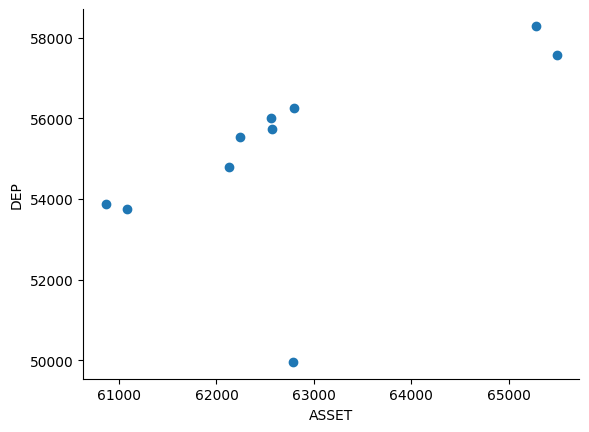

In [ ]:
from matplotlib import pyplot as plt
x=printData['ASSET']
y=printData['DEP']
plt.xlabel("ASSET")
plt.ylabel("DEP")
plt.scatter(x, y)
plt.gca().spines[['top', 'right']].set_visible(False)


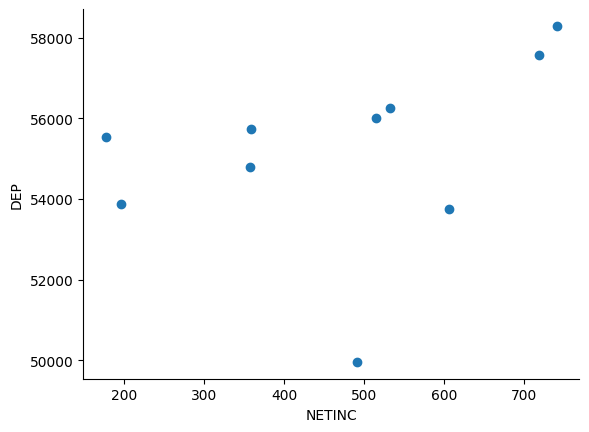

In [ ]:
x=printData['NETINC']
y=printData['DEP']
plt.xlabel("NETINC")
plt.ylabel("DEP")
plt.scatter(x, y)
plt.gca().spines[['top', 'right']].set_visible(False)

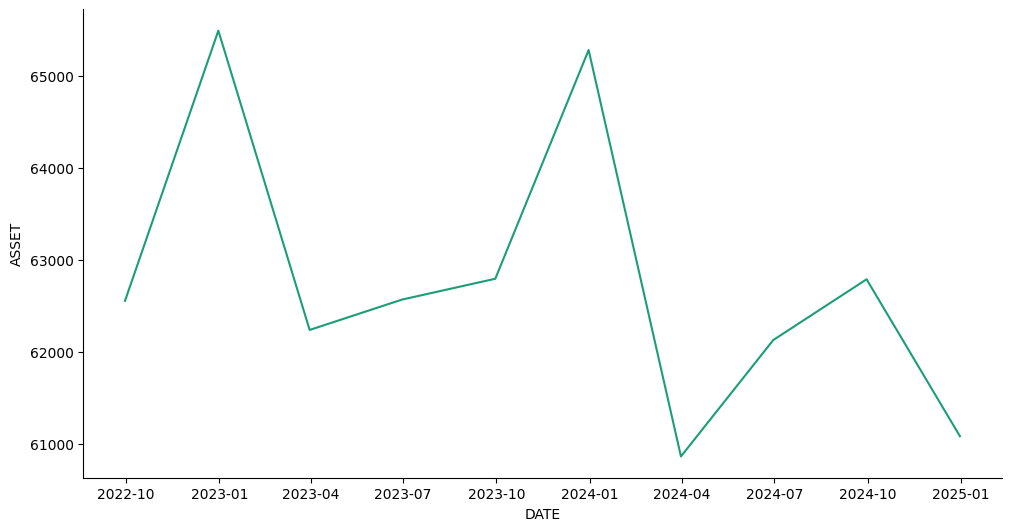

In [ ]:
import seaborn as sns
def plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = printData['DATE']
  ys = printData['ASSET']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = printData.sort_values('DATE', ascending=True)
plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATE')
_ = plt.ylabel('ASSET')

In [ ]:
#DO NOT RUN UNLESS YOU HAVE TO
#data = bf.get_institutions()
#for value in data.values():
#  print(value)


In [ ]:
data = bf.get_institutions(filters="ROE:[-1 TO 1]")
print(data)

{'meta': {'total': 3575, 'parameters': {'filters': 'ROE:[-1 TO 1]', 'fields': 'ACTIVE,ADDRESS,ASSET,BKCLASS,CB,CBSA,CBSA_DIV,CBSA_DIV_FLG,CBSA_DIV_NO,CBSA_METRO,CBSA_METRO_FLG,CBSA_METRO_NAME,CBSA_MICRO_FLG,CBSA_NO,CERT,CERTCONS,CFPBEFFDTE,CFPBENDDTE,CFPBFLAG,CHANGEC1,CHANGEC2,CHANGEC3,CHANGEC4,CHANGEC5,CHANGEC6,CHANGEC7,CHANGEC8,CHANGEC9,CHANGEC10,CHANGEC11,CHANGEC12,CHANGEC13,CHANGEC14,CHANGEC15,CHARTER,CHRTAGNT,CITY,CITYHCR,CLCODE,CMSA_NO,CMSA,CONSERVE,COUNTY,CSA,CSA_NO,CSA_FLG,DATEUPDT,DENOVO,DEP,DEPDOM,DOCKET,EFFDATE,ENDEFYMD,EQ,ESTYMD,FDICDBS,FDICREGN,FDICSUPV,FED,FED_RSSD,FEDCHRTR,FLDOFF,FORM31,HCTMULT,IBA,INACTIVE,INSAGNT1,INSAGNT2,INSBIF,INSCOML,INSDATE,INSDIF,INSFDIC,INSSAIF,INSSAVE,INSTAG,INSTCRCD,LAW_SASSER_FLG,MSA,MSA_NO,MUTUAL,NAME,NAMEHCR,NETINC,NETINCQ,NEWCERT,OAKAR,OCCDIST,OFFDOM,OFFFOR,OFFICES,OFFOA,OTSDIST,OTSREGNM,PARCERT,PROCDATE,QBPRCOML,REGAGNT,REGAGENT2,REPDTE,RISDATE,ROA,ROAPTX,ROAPTXQ,ROAQ,ROE,ROEQ,RSSDHCR,RUNDATE,SASSER,SPECGRP,SPECGRPN,STALP,STALPHCR,STCHRTR